In [1]:
import cv2 as cv

In [3]:
print(cv.__version__)

4.1.1


# Read an image


--  Use the function cv2.imread() to read an image. The image should be in the working directory or a full path of image should be given.

Second argument is a flag which specifies the way image should be read.

1> cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.

2> cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode

3> cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

Note:-
       Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

In [9]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('axi.jpg',1)
print(img)

[[[208 205 201]
  [207 204 200]
  [209 206 202]
  ...
  [252 255 253]
  [252 255 253]
  [252 255 253]]

 [[206 203 199]
  [206 203 199]
  [208 205 201]
  ...
  [252 255 253]
  [252 255 253]
  [252 255 253]]

 [[206 203 199]
  [206 203 199]
  [208 203 200]
  ...
  [252 255 253]
  [252 255 253]
  [252 255 253]]

 ...

 [[187 184 200]
  [185 182 198]
  [184 184 198]
  ...
  [197 199 210]
  [197 197 209]
  [196 196 208]]

 [[185 184 200]
  [184 183 199]
  [186 183 198]
  ...
  [198 199 209]
  [192 194 205]
  [190 192 203]]

 [[185 184 200]
  [184 184 198]
  [186 183 198]
  ...
  [195 196 206]
  [189 191 202]
  [184 186 197]]]


# Display an image


In [13]:
cv2.imshow('image',img) #cv2.imshow() to display an image in a window.  The window automatically fits to the image size. First argument is a window name which is a string. second argument is our image
cv2.waitKey(0) 
cv2.destroyAllWindows()

* cv2.waitKey():-  is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. 

  If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which we will discuss below.

*  cv2.destroyAllWindows():-  simply destroys all the windows we created. If you want to destroy any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.

* Note:-
       There is a special case where you can already create a window and load image to it later. In that case, you can specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be helpful when image is too large in dimension and adding track bar to windows.

In [11]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Write an image


In [12]:
cv2.imwrite('messigray.png',img) #cv2.imwrite() to save an image.
#First argument is the file name, second argument is the image you want to save.

True

# Sum it up
 

In [16]:
#Below program loads an image in grayscale, displays it, save the image if you press ‘s’ and exit, or simply exit without saving if you press ESC key.
import numpy as np
import cv2

img = cv2.imread('axi.jpg',1)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

* Warning:-
         If you are using a 64-bit machine, you will have to modify k = cv2.waitKey(0) line as follows : k = cv2.waitKey(0) & 0xFF

# Using Matplotlib


In [1]:
#Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. 
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('axi.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

* Warning:-
          Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. 

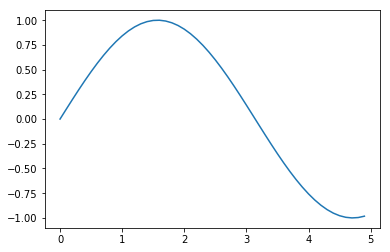

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1);
y = np.sin(x)
plt.plot(x, y)

# Capture Video from Camera


In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read() #cap.read() returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Playing Video from file


In [4]:
import numpy as np
import cv2

cap = cv2.VideoCapture('axi.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Saving a Video


This time we create a VideoWriter object. We should specify the output file name (eg: output.avi). Then we should specify the FourCC code (details in next paragraph). Then number of frames per second (fps) and frame size should be passed. And last one is isColor flag. If it is True, encoder expect color frame, otherwise it works with grayscale frame.

FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. Following codecs works fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)

In Windows: DIVX (More to be tested and added)

In OSX : (I don’t have access to OSX. Can some one fill this?)
FourCC code is passed as cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG) for MJPG.

In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# Drawing Functions in OpenCV


* img : The image where you want to draw the shapes

* color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.

* thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. default thickness = 1

* lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA gives anti-aliased line which looks great for curves.

#  Drawing Line


In [5]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# Drawing Rectangle


In [7]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing Circle


In [8]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Drawing Ellipse

In [9]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon


In [10]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

# Adding Text to Images

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

# Result

In [12]:
cv2.imshow('image',img) #cv2.imshow() to display an image in a window.  The window automatically fits to the image size. First argument is a window name which is a string. second argument is our image
cv2.waitKey(0) 
cv2.destroyAllWindows()

# Mouse as a Paint-Brush


In [14]:
import cv2
import numpy as np

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [16]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [17]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

# Trackbar as the Color Palette


In [18]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

# Arithmetic Operations on Images


# Image Addition


In [21]:
img1 = cv2.imread('Aviary Stock Photo 1.png')
img2 = cv2.imread('Aviary Stock Photo 2.png')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Bitwise Operations


In [23]:
# Load two images
img1 = cv2.imread('Aviary Stock Photo 1.png')
img2 = cv2.imread('Aviary Stock Photo 2.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()